In [38]:
import pandas as pd 
import numpy as np

In [39]:
df = pd.read_excel('transactiondata.xlsx')
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [40]:
df.describe(include='all')

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306,16306,16306,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
unique,200,926,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FAM194,FAM194_Member7,NaN,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,167,30,NaN,2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2024-10-16 00:34:31.777259776,NaN,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
min,NaN,NaN,2024-10-01 00:00:00,NaN,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,NaN,NaN,2024-10-08 00:00:00,NaN,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,NaN,NaN,2024-10-16 00:00:00,NaN,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,NaN,NaN,2024-10-24 00:00:00,NaN,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,NaN,NaN,2024-10-31 00:00:00,NaN,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000


In [41]:
df.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')

In [42]:
# Family spending habits
familydf = df[['Family ID','Income', 'Savings', 'Monthly Expenses', 'Loan Payments','Credit Card Spending', 'Dependents', 'Financial Goals Met (%)']]
familydf = familydf.drop_duplicates()
familydf

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,113810,20234,5781,2422,2959,2,68
93,FAM002,44592,29492,5630,4541,995,3,60
181,FAM003,33278,11365,5282,1042,2818,0,100
228,FAM004,127196,30735,3591,1571,668,3,82
323,FAM005,66048,1212,3136,3444,1922,5,89
...,...,...,...,...,...,...,...,...
15866,FAM196,64973,3604,3533,622,744,5,26
15990,FAM197,130741,41591,6463,4850,1179,0,62
16009,FAM198,114012,6372,4345,1989,1759,2,51
16085,FAM199,74587,28474,3672,834,2937,5,36


In [43]:
# Member specific spending habits
memberdf = df[['Family ID', 'Category', 'Amount']]
vis1 = df[['Category', 'Amount']]
memberdf

,Family ID,Category,Amount
0,FAM001,Travel,409.12
1,FAM001,Travel,270.91
2,FAM001,Groceries,91.10
3,FAM001,Healthcare,198.23
4,FAM001,Education,206.42
...,...,...,...
16301,FAM200,Groceries,79.99
16302,FAM200,Education,228.39
16303,FAM200,Travel,258.63
16304,FAM200,Travel,467.46


In [44]:
# Let us explore the member specific spending habits and the see what we can learn
memberdf['Category'].unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [45]:
# Perhaps if we combine all the expenses and split them into lavish and neccesary expenditures
memberdf.loc[memberdf['Category'].isin(['Travel', 'Food', 'Entertainment']),'Type'] = 'Lavish'
memberdf.loc[memberdf['Category'].isin(['Groceries','Healthcare','Education','Utilities']), 'Type'] = 'Necessity'
memberdf

C:\Users\royal\AppData\Local\Temp\ipykernel_24908\4113144718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memberdf.loc[memberdf['Category'].isin(['Travel', 'Food', 'Entertainment']),'Type'] = 'Lavish'


,Family ID,Category,Amount,Type
0,FAM001,Travel,409.12,Lavish
1,FAM001,Travel,270.91,Lavish
2,FAM001,Groceries,91.10,Necessity
3,FAM001,Healthcare,198.23,Necessity
4,FAM001,Education,206.42,Necessity
...,...,...,...,...
16301,FAM200,Groceries,79.99,Necessity
16302,FAM200,Education,228.39,Necessity
16303,FAM200,Travel,258.63,Lavish
16304,FAM200,Travel,467.46,Lavish


In [46]:
memberdf = memberdf[['Family ID', 'Amount', 'Type']].groupby(['Family ID', 'Type']).sum().reset_index()
# memberdf['Lavish to Necessity %'] = (memberdf['Amount'][memberdf['Type'] == 'Lavish'] / memberdf['Amount'][memberdf['Type'] == 'Necessity']) * 100
memberdf


,Family ID,Type,Amount
0,FAM001,Lavish,13126.59
1,FAM001,Necessity,10062.31
2,FAM002,Lavish,8605.83
3,FAM002,Necessity,13703.88
4,FAM003,Lavish,4876.06
...,...,...,...
395,FAM198,Necessity,9926.56
396,FAM199,Lavish,13271.30
397,FAM199,Necessity,17738.35
398,FAM200,Lavish,13061.85


In [47]:
memberdf = memberdf[['Family ID', 'Amount', 'Type']].pivot(index='Family ID', columns='Type', values='Amount')
memberdf['Lavish to Necessity %'] = (memberdf['Lavish'] / memberdf['Necessity']) * 100
memberdf = memberdf.reset_index()
memberdf

Type,Family ID,Lavish,Necessity,Lavish to Necessity %
0,FAM001,13126.59,10062.31,130.453047
1,FAM002,8605.83,13703.88,62.798492
2,FAM003,4876.06,6344.28,76.857579
3,FAM004,11398.92,12084.18,94.329280
4,FAM005,15869.95,24376.26,65.104122
...,...,...,...,...
195,FAM196,11895.04,19538.30,60.880629
196,FAM197,1576.50,2456.32,64.181377
197,FAM198,9452.03,9926.56,95.219593
198,FAM199,13271.30,17738.35,74.816993


In [48]:
#Now moving on to familydf
familydf.head()

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,113810,20234,5781,2422,2959,2,68
93,FAM002,44592,29492,5630,4541,995,3,60
181,FAM003,33278,11365,5282,1042,2818,0,100
228,FAM004,127196,30735,3591,1571,668,3,82
323,FAM005,66048,1212,3136,3444,1922,5,89


In [49]:
familydf.describe(include='all')

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FAM001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,89008.340000,24433.550000,3933.415000,2572.730000,1816.845000,2.630000,59.820000
std,NaN,34688.274211,14433.418382,1727.281253,1408.649596,718.719059,1.626755,22.998309
min,NaN,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,NaN,58866.000000,11531.500000,2535.000000,1416.250000,1252.250000,1.000000,39.750000
50%,NaN,87516.500000,25488.000000,3716.500000,2577.000000,1747.000000,3.000000,58.000000
75%,NaN,119232.250000,36367.750000,5481.500000,3749.750000,2451.500000,4.000000,78.000000


In [50]:
familydf.columns

Index(['Family ID', 'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')

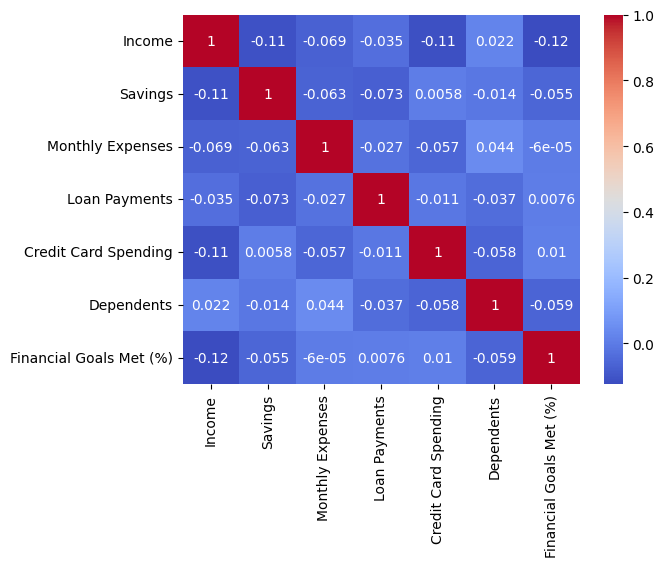

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
family_corr = familydf[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments','Credit Card Spending', 'Dependents', 'Financial Goals Met (%)']].corr()

sns.heatmap(family_corr, annot=True, cmap='coolwarm')
plt.show()

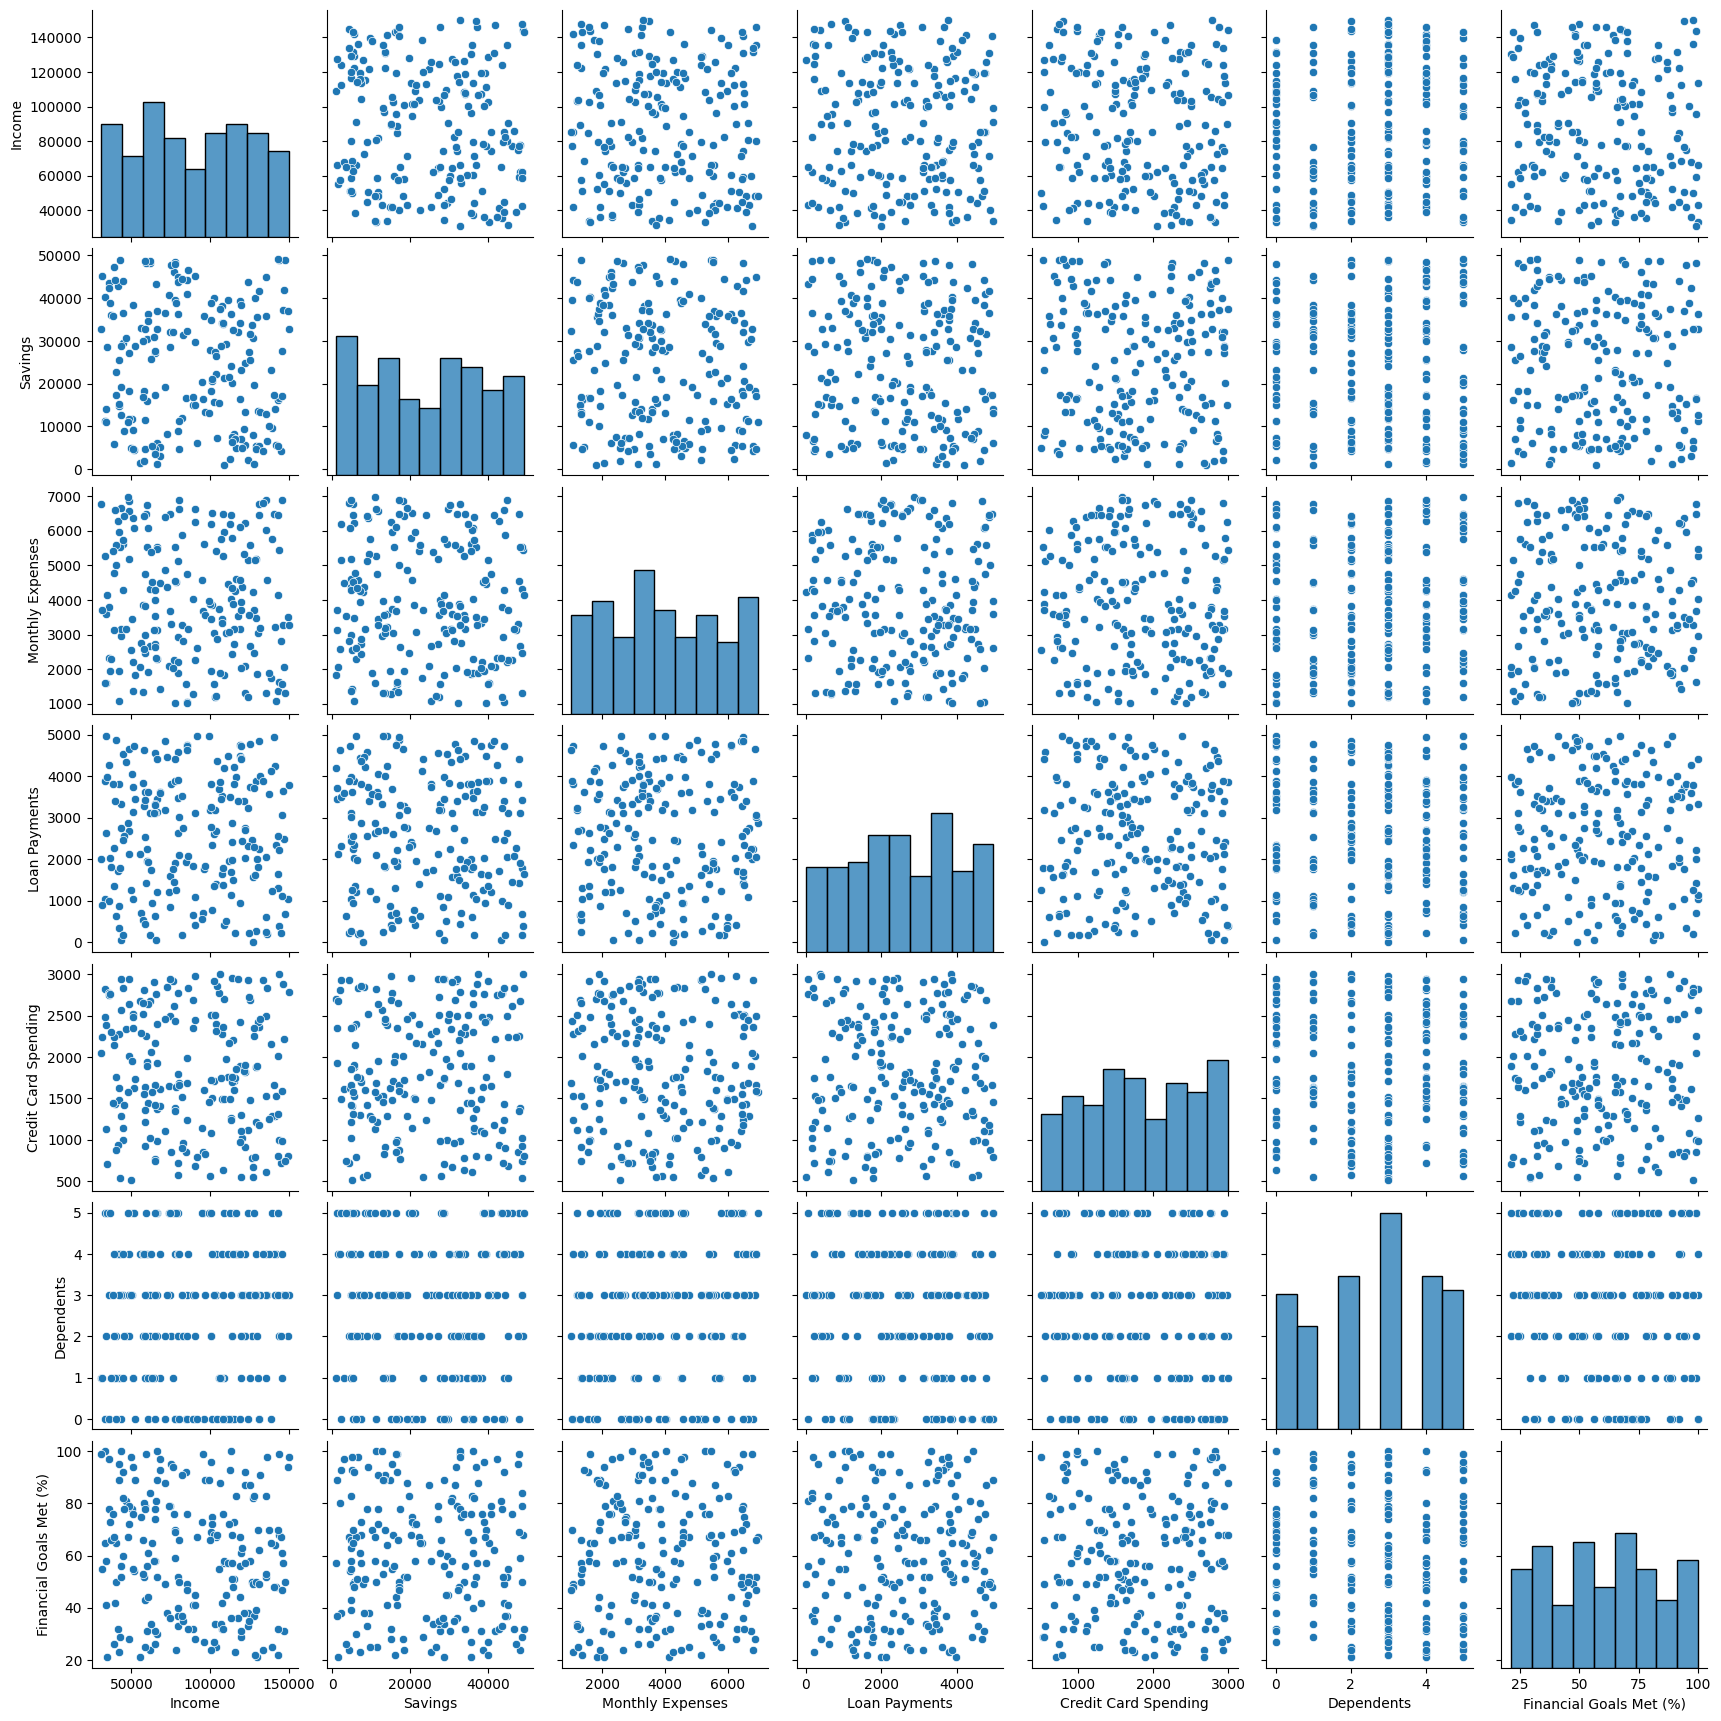

In [52]:
# Income vs expense correlation is -0.069
# Saving vs Credit Card spending correlation is 0.0058 only
sns.pairplot(familydf)
plt.show()

In [53]:
# No genuine correlations. Perhaps some feature engineering
# Building Financial scoring model factors simultaneously as instructed
familydf['Savings to Income'] = familydf['Savings']/familydf['Income']
familydf['Expense Percentage'] = (familydf['Monthly Expenses']/familydf['Income'])*100
familydf['Loan Percentage'] = (familydf['Loan Payments']/familydf['Income'])*100
familydf['Credit Utilization Percentage'] = (familydf['Credit Card Spending']/familydf['Income'])*100
familydf = familydf.merge(memberdf, how='right',on='Family ID')
familydf

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Savings to Income,Expense Percentage,Loan Percentage,Credit Utilization Percentage,Lavish,Necessity,Lavish to Necessity %
0,FAM001,113810,20234,5781,2422,2959,2,68,0.177788,5.079518,2.128108,2.599947,13126.59,10062.31,130.453047
1,FAM002,44592,29492,5630,4541,995,3,60,0.661374,12.625583,10.183441,2.231342,8605.83,13703.88,62.798492
2,FAM003,33278,11365,5282,1042,2818,0,100,0.341517,15.872348,3.131198,8.468057,4876.06,6344.28,76.857579
3,FAM004,127196,30735,3591,1571,668,3,82,0.241635,2.823202,1.235102,0.525174,11398.92,12084.18,94.329280
4,FAM005,66048,1212,3136,3444,1922,5,89,0.018350,4.748062,5.214390,2.910005,15869.95,24376.26,65.104122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,FAM196,64973,3604,3533,622,744,5,26,0.055469,5.437643,0.957321,1.145091,11895.04,19538.30,60.880629
196,FAM197,130741,41591,6463,4850,1179,0,62,0.318117,4.943361,3.709624,0.901783,1576.50,2456.32,64.181377
197,FAM198,114012,6372,4345,1989,1759,2,51,0.055889,3.811002,1.744553,1.542820,9452.03,9926.56,95.219593
198,FAM199,74587,28474,3672,834,2937,5,36,0.381756,4.923110,1.118157,3.937684,13271.30,17738.35,74.816993


In [54]:
familydf.columns

Index(['Family ID', 'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)',
       'Savings to Income', 'Expense Percentage', 'Loan Percentage',
       'Credit Utilization Percentage', 'Lavish', 'Necessity',
       'Lavish to Necessity %'],
      dtype='object')

In [55]:
familydf = familydf.drop(['Lavish','Necessity'], axis='columns')

In [56]:
familydf.describe(include='all')

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Savings to Income,Expense Percentage,Loan Percentage,Credit Utilization Percentage,Lavish to Necessity %
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FAM001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,89008.340000,24433.550000,3933.415000,2572.730000,1816.845000,2.630000,59.820000,0.341068,5.404443,3.488979,2.511305,78.030673
std,NaN,34688.274211,14433.418382,1727.281253,1408.649596,718.719059,1.626755,22.998309,0.287037,3.796263,2.655435,1.691652,21.734213
min,NaN,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000,0.008939,0.759282,0.002361,0.433585,21.679049
25%,NaN,58866.000000,11531.500000,2535.000000,1416.250000,1252.250000,1.000000,39.750000,0.116941,2.813003,1.586683,1.355373,62.029996
50%,NaN,87516.500000,25488.000000,3716.500000,2577.000000,1747.000000,3.000000,58.000000,0.269623,4.350663,2.978408,2.080022,76.103308
75%,NaN,119232.250000,36367.750000,5481.500000,3749.750000,2451.500000,4.000000,78.000000,0.483098,6.727481,5.001731,3.303840,92.915202


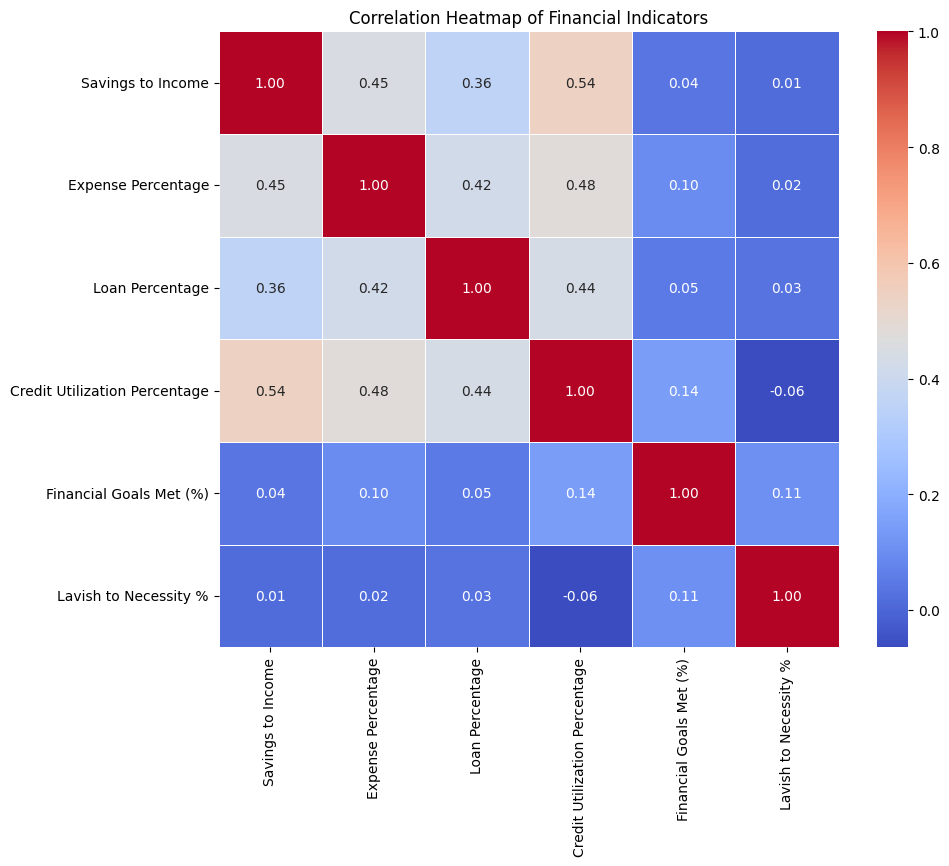

In [57]:
corr_matrix = familydf[['Savings to Income', 'Expense Percentage', 'Loan Percentage', 'Credit Utilization Percentage','Financial Goals Met (%)','Lavish to Necessity %']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Financial Indicators')
plt.show()


In [ ]:
# STILL no meaningful relationships. 
# There is some moderate linear relationship between credit card vs savings ratio and credit card vs expense ratio.

<Figure size 1500x1000 with 0 Axes>

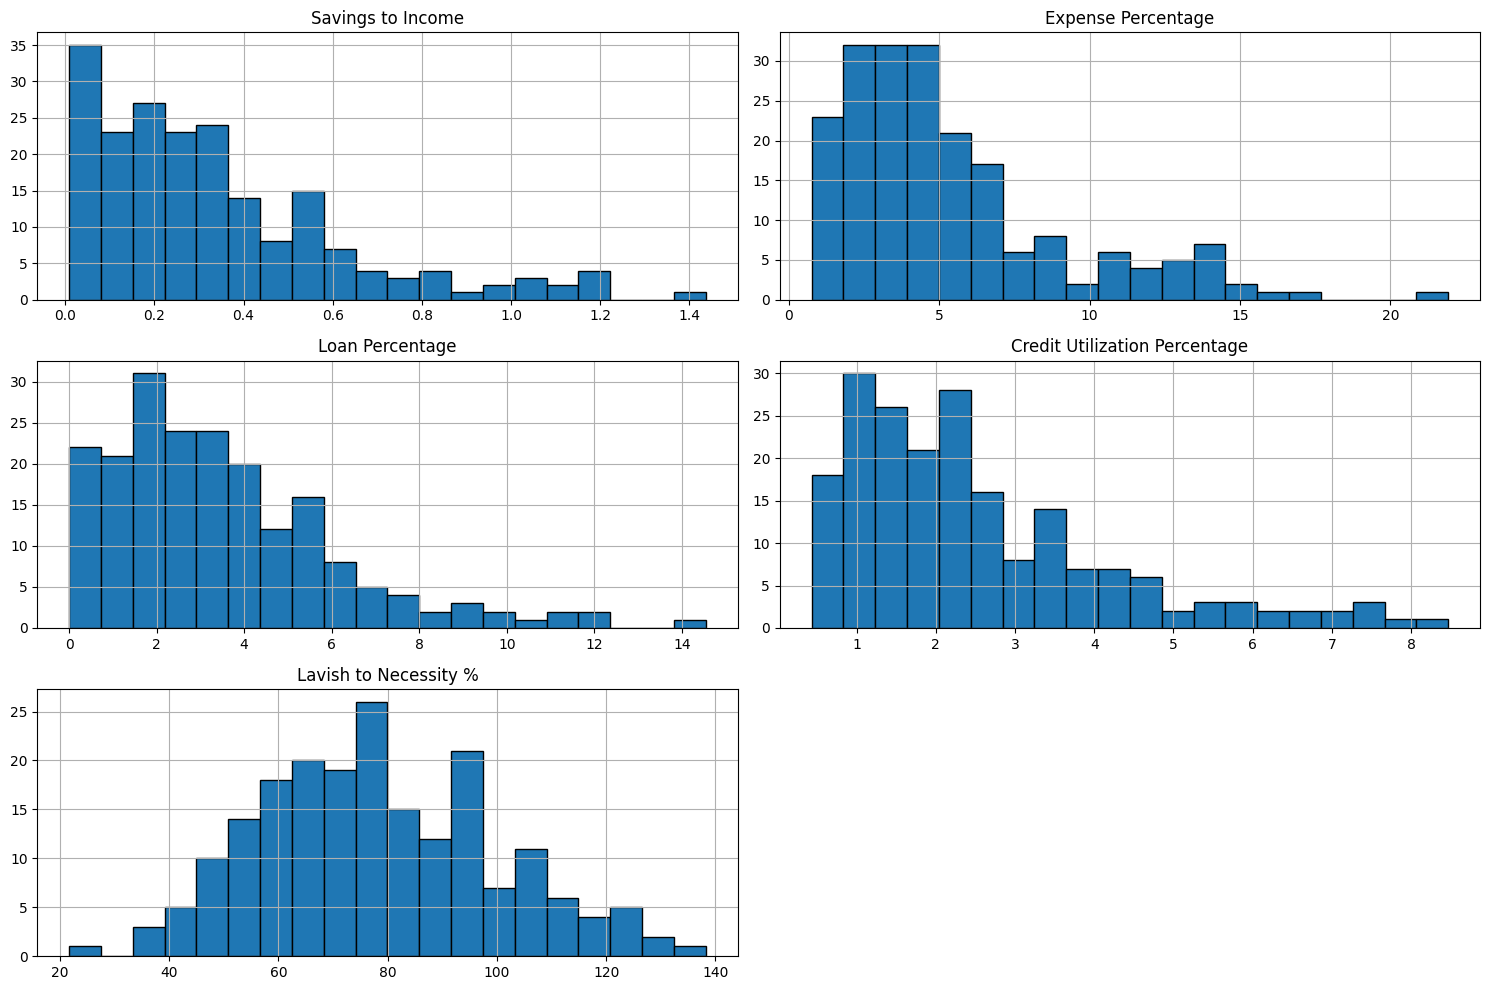

In [59]:
plt.figure(figsize=(15, 10))
familydf[['Savings to Income', 'Expense Percentage', 'Loan Percentage', 'Credit Utilization Percentage','Lavish to Necessity %']].hist(bins=20, edgecolor='black', figsize=(15, 10))
plt.tight_layout()
plt.show()


In [60]:
# All skewed left, Very few people have more savings than is their income; Most people have only 2-5% of their income as expenses. 
# There is definitely more to learn by utilizing scikit learn as in non-linear relationships (unfortunately, not equipped to handle those yet)
# Now we must try to build a scoring model using all the information we've learned about the dataset

In [61]:
# Firstly, lets normalize all the scores we will use for building the scoring schema
def normalize(record):
    return (record - record.min())/(record.max() - record.min())*100

familydf['Savings to Income'] = normalize(familydf['Savings to Income'])
familydf['Expense Percentage'] = normalize(familydf['Expense Percentage'])
familydf['Loan Percentage'] = normalize(familydf['Loan Percentage'])
familydf['Credit Utilization Percentage'] = normalize(familydf['Credit Utilization Percentage'])
familydf['Lavish to Necessity %'] = normalize(familydf['Lavish to Necessity %'])
familydf

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Savings to Income,Expense Percentage,Loan Percentage,Credit Utilization Percentage,Lavish to Necessity %
0,FAM001,113810,20234,5781,2422,2959,2,68,11.829227,20.414864,14.618224,26.963342,93.337268
1,FAM002,44592,29492,5630,4541,995,3,60,45.708389,56.073067,70.012694,22.375544,35.283952
2,FAM003,33278,11365,5282,1042,2818,0,100,23.299795,71.415344,21.516215,100.000000,47.347834
3,FAM004,127196,30735,3591,1571,668,3,82,16.302255,9.752857,8.477246,1.139946,62.340028
4,FAM005,66048,1212,3136,3444,1922,5,89,0.659357,18.848598,35.841794,30.822433,37.262376
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,FAM196,64973,3604,3533,622,744,5,26,3.259837,22.107149,6.567017,8.855665,33.638264
196,FAM197,130741,41591,6463,4850,1179,0,62,21.660476,19.771466,25.493907,5.827362,36.470584
197,FAM198,114012,6372,4345,1989,1759,2,51,3.289237,14.420613,11.980614,13.805947,63.103992
198,FAM199,74587,28474,3672,834,2937,5,36,26.118836,19.675770,7.673049,43.613301,45.596839


In [62]:
# Now I'll have to apply weights to each of these based on how much they potentially impact the financial health of a family
familydf.columns

Index(['Family ID', 'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)',
       'Savings to Income', 'Expense Percentage', 'Loan Percentage',
       'Credit Utilization Percentage', 'Lavish to Necessity %'],
      dtype='object')

In [63]:
familydf[['Financial Goals Met (%)','Savings to Income', 'Expense Percentage', 'Loan Percentage','Credit Utilization Percentage', 'Lavish to Necessity %']].corr()

,Financial Goals Met (%),Savings to Income,Expense Percentage,Loan Percentage,Credit Utilization Percentage,Lavish to Necessity %
Financial Goals Met (%),1.000000,0.039172,0.096312,0.048694,0.143465,0.108288
Savings to Income,0.039172,1.000000,0.450450,0.356758,0.541088,0.012863
Expense Percentage,0.096312,0.450450,1.000000,0.420502,0.481861,0.016777
Loan Percentage,0.048694,0.356758,0.420502,1.000000,0.435497,0.031119
Credit Utilization Percentage,0.143465,0.541088,0.481861,0.435497,1.000000,-0.064759
Lavish to Necessity %,0.108288,0.012863,0.016777,0.031119,-0.064759,1.000000


In [64]:
# Trying a linear model first to see if we can get acceptable 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

X = familydf[['Savings to Income', 'Expense Percentage', 'Loan Percentage','Credit Utilization Percentage', 'Lavish to Necessity %']]
y = familydf['Financial Goals Met (%)']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=20)

scoremodel = RandomForestRegressor(random_state=20)
scoremodel.fit(X_train, y_train)
y_predicted = scoremodel.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
print(mse)

# MSE is obviously too high ~20% points


442.62623


In [65]:
# For the purposes of this assignment, due to my knowledge and time constraints, i will unfortunately have to use static weights to calculate the financial score. 
# I'll have to compare how much impact each of the features have made with the 'Financial Goals met'
# I'll use (Corr Score/Total Corr Score) in % here
# Total corr score = 0.434; Feature scores respectively: 8%, 22%, 12%, 33%, 25% (rounded off)
weights = {
    'savingstoincomescore': 0.08,
    'expensepercentagescore': 0.22,
    'loanpercentagescore': 0.12,
    'creditutilizationscore': 0.33,
    'lifestylescore': 0.25
}

In [66]:
familydf['Financial Score'] = (
    familydf['Savings to Income'] * weights['savingstoincomescore'] + familydf['Expense Percentage'] * weights['expensepercentagescore'] + familydf['Loan Percentage'] * weights['loanpercentagescore'] + familydf['Credit Utilization Percentage'] * weights['creditutilizationscore'] + familydf['Lavish to Necessity %'] * weights['lifestylescore']
)
familydf.head()

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Savings to Income,Expense Percentage,Loan Percentage,Credit Utilization Percentage,Lavish to Necessity %,Financial Score
0,FAM001,113810,20234,5781,2422,2959,2,68,11.829227,20.414864,14.618224,26.963342,93.337268,39.424015
1,FAM002,44592,29492,5630,4541,995,3,60,45.708389,56.073067,70.012694,22.375544,35.283952,40.599187
2,FAM003,33278,11365,5282,1042,2818,0,100,23.299795,71.415344,21.516215,100.000000,47.347834,64.994264
3,FAM004,127196,30735,3591,1571,668,3,82,16.302255,9.752857,8.477246,1.139946,62.340028,20.428268
4,FAM005,66048,1212,3136,3444,1922,5,89,0.659357,18.848598,35.841794,30.822433,37.262376,27.987452


In [67]:
familydf.describe(include='all')

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Savings to Income,Expense Percentage,Loan Percentage,Credit Utilization Percentage,Lavish to Necessity %,Financial Score
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FAM001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,89008.340000,24433.550000,3933.415000,2572.730000,1816.845000,2.630000,59.820000,23.268325,21.950265,23.976583,25.860069,48.354448,30.190149
std,NaN,34688.274211,14433.418382,1727.281253,1408.649596,718.719059,1.626755,22.998309,20.109265,17.938877,18.260749,21.054922,18.649789,12.550788
min,NaN,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.904885
25%,NaN,58866.000000,11531.500000,2535.000000,1416.250000,1252.250000,1.000000,39.750000,7.566412,9.704663,10.894979,11.472915,34.624517,20.580144
50%,NaN,87516.500000,25488.000000,3716.500000,2577.000000,1747.000000,3.000000,58.000000,18.263035,16.970729,20.465516,20.492163,46.700606,27.302025
75%,NaN,119232.250000,36367.750000,5481.500000,3749.750000,2451.500000,4.000000,78.000000,33.218713,28.202154,34.379397,35.724252,61.126630,39.513177


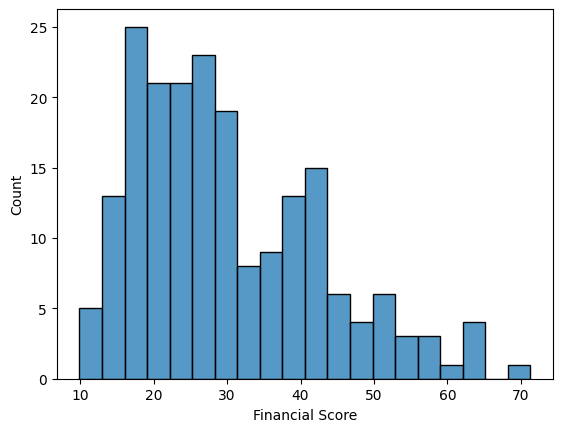

In [68]:
sns.histplot(familydf['Financial Score'], bins=20,)
plt.show()

In [ ]:
# Now to add the recommendations based on their scores
def recommendations(row):
    
    recommendations = []
    # less than the median (50% in preceding familydf.describe())
    if row['Savings to Income'] < 18:
        recommendations += ['Try saving more of your money wrt income']
    elif row['Expense Percentage'] < 17:
        recommendations += ['Attempt reducing your expenses']
    elif row['Loan Percentage'] < 20:
        recommendations += ['Perhaps try reducing your debt burden']
    elif row['Credit Utilization Percentage'] < 20:
        recommendations += ['Try cutting back on credit card purchases']
    elif row['Lavish to Necessity %'] < 47:
        recommendations += ['Try being more mindful of your purchase requirements']

    return recommendations

familydf['Recommendations'] = familydf.apply(recommendations, axis=1)
familydf

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Savings to Income,Expense Percentage,Loan Percentage,Credit Utilization Percentage,Lavish to Necessity %,Financial Score,Recommendations
0,FAM001,113810,20234,5781,2422,2959,2,68,11.829227,20.414864,14.618224,26.963342,93.337268,39.424015,[Try saving more of your money wrt income]
1,FAM002,44592,29492,5630,4541,995,3,60,45.708389,56.073067,70.012694,22.375544,35.283952,40.599187,[Try being more mindful of your purchase requi...
2,FAM003,33278,11365,5282,1042,2818,0,100,23.299795,71.415344,21.516215,100.000000,47.347834,64.994264,[]
3,FAM004,127196,30735,3591,1571,668,3,82,16.302255,9.752857,8.477246,1.139946,62.340028,20.428268,[Try saving more of your money wrt income]
4,FAM005,66048,1212,3136,3444,1922,5,89,0.659357,18.848598,35.841794,30.822433,37.262376,27.987452,[Try saving more of your money wrt income]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,FAM196,64973,3604,3533,622,744,5,26,3.259837,22.107149,6.567017,8.855665,33.638264,17.244337,[Try saving more of your money wrt income]
196,FAM197,130741,41591,6463,4850,1179,0,62,21.660476,19.771466,25.493907,5.827362,36.470584,20.182505,[Try cutting back on credit card purchases]
197,FAM198,114012,6372,4345,1989,1759,2,51,3.289237,14.420613,11.980614,13.805947,63.103992,25.205308,[Try saving more of your money wrt income]
198,FAM199,74587,28474,3672,834,2937,5,36,26.118836,19.675770,7.673049,43.613301,45.596839,33.130541,[Perhaps try reducing your debt burden]


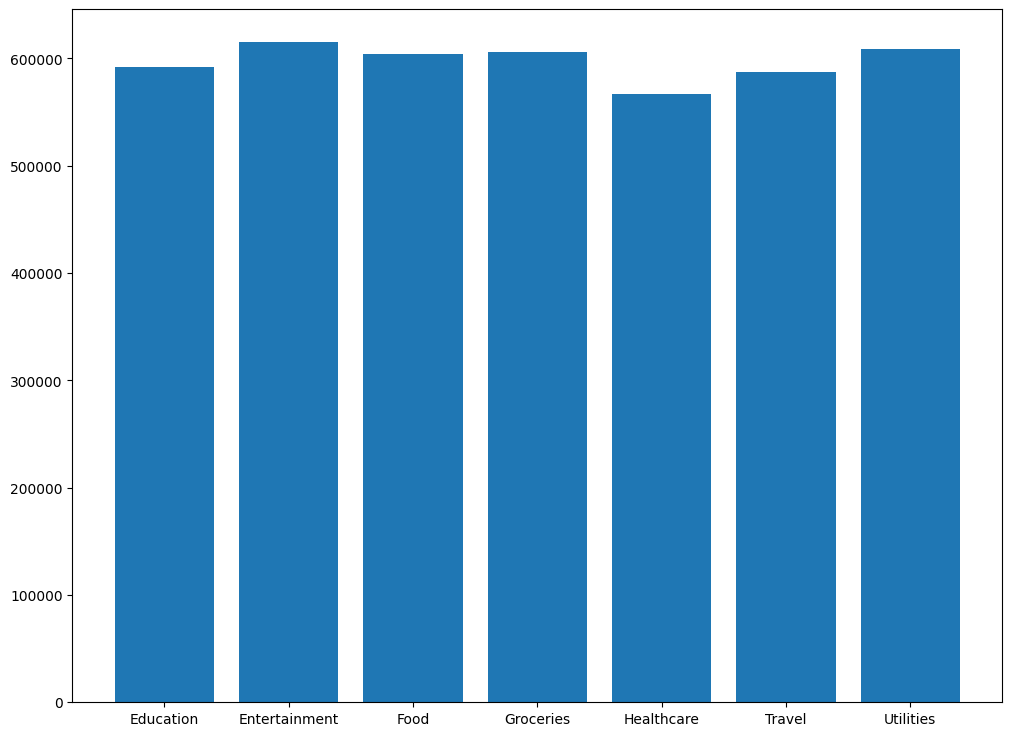

In [70]:
# Visualizations as instructed
# Spending distribution across categories.
vis1 =  vis1.groupby(['Category']).sum()
vis1 = vis1.reset_index()
vis1
plt.figure(figsize=(12,9))
plt.bar(vis1['Category'], vis1['Amount'])
plt.show()

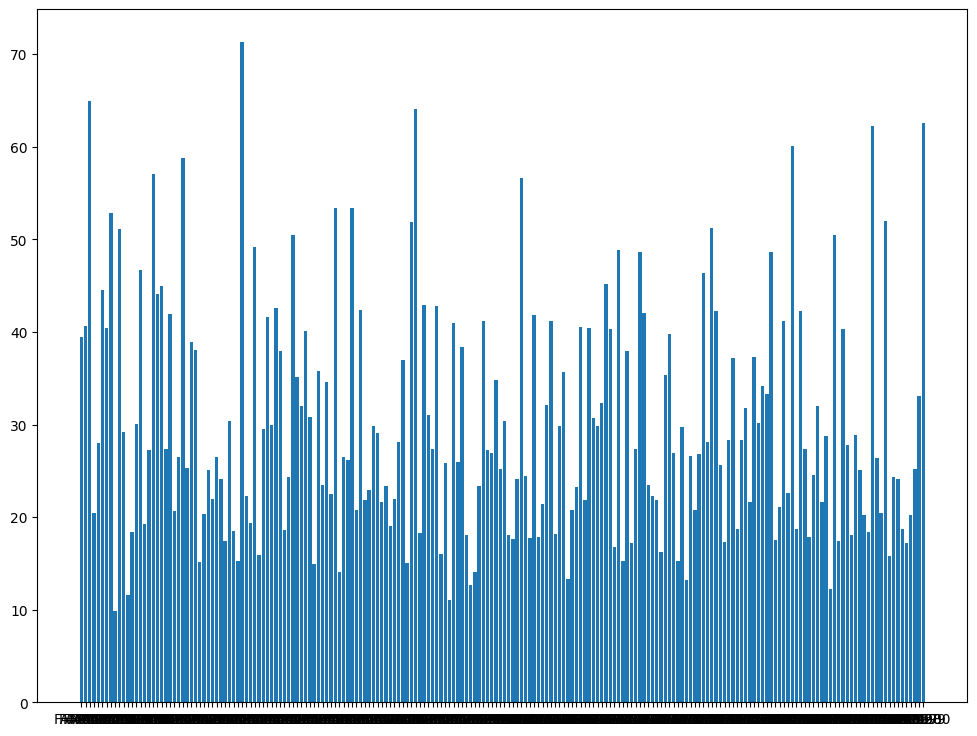

In [71]:
# Family wise financial score
plt.figure(figsize=(12,9))
plt.bar(familydf['Family ID'],familydf['Financial Score'])
plt.show()

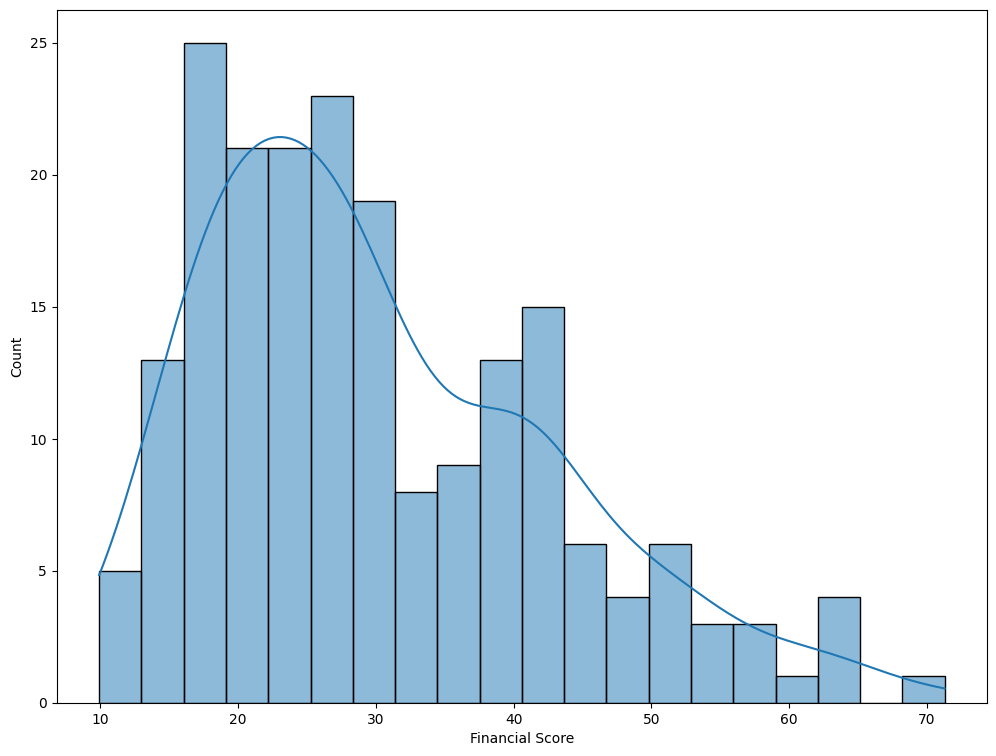

In [72]:
# Histogram of financial scores
plt.figure(figsize=(12, 9))
sns.histplot(familydf['Financial Score'], bins=20, kde=True)
plt.show()